# 概要
fulcher-α発光線の発光強度からボルツマンプロットを作成する

In [1]:
!pip install git+https://github.com/AtsushiNi/spectrumutils

from spectrumutils import fulcher, spectrum as sp
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [2]:
#パッケージ開発用
"""
import os
import sys
sys.path.append(os.pardir)
from src.spectrumutils import fulcher, spectrum as sp
"""

# Fulcher-α帯の波長校正
## サンプルデータ

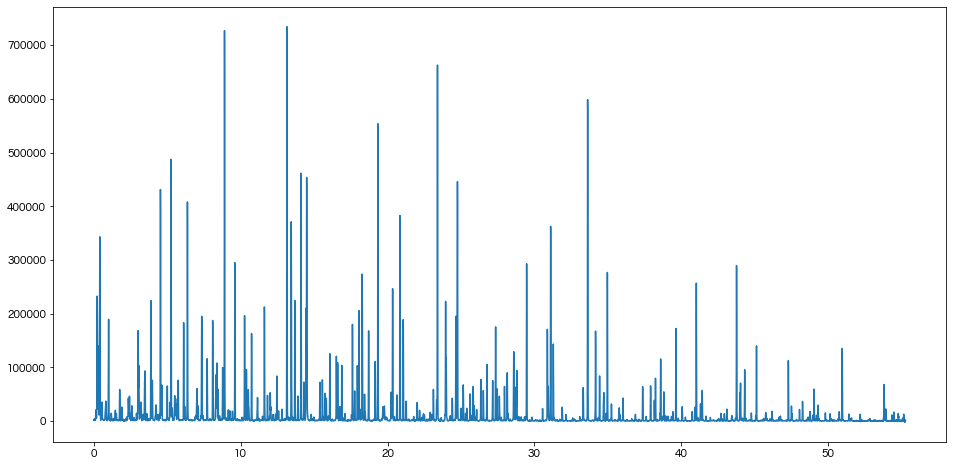

In [3]:
pixel, spectrum = np.load('data/fulcher_spectrum.npy')

plt.figure(figsize=(16,8))
plt.plot(pixel, spectrum)

## Q1による大まかな波長校正

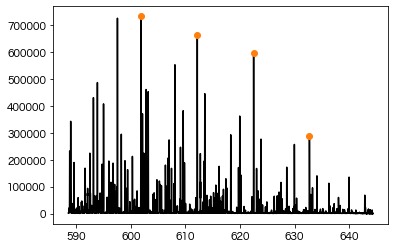

In [4]:
# Q1を使ってざっくり波長校正
# borderにはQ1を検出する区間を指定
wavelength = fulcher.calibrate_by_Q1(pixel, spectrum, border=[10,20,30,40,50])


## 各発光線による精確な波長校正

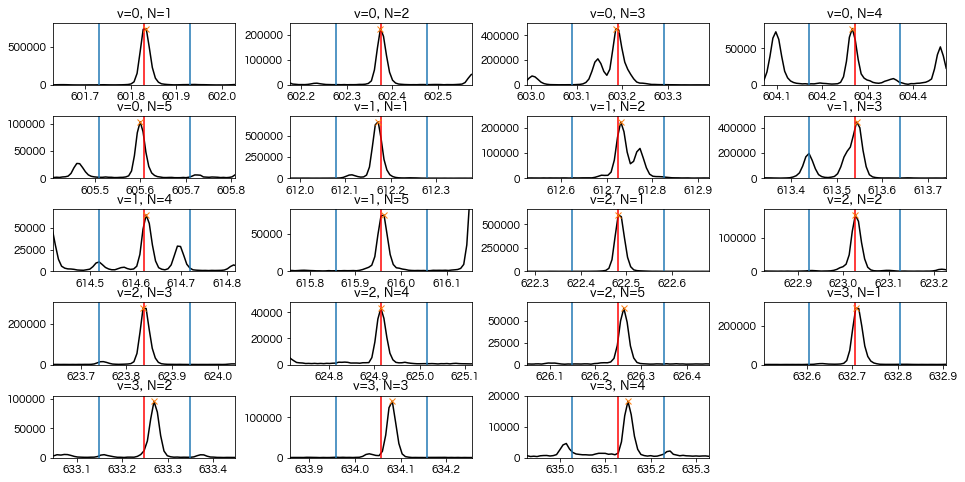

In [5]:
lines=[
    np.arange(1,6), # v=0
    np.arange(1,6), # v=1
    np.arange(1,6), # v=2
    np.arange(1,5), # v=3
]
peak, target = fulcher.detect_lines(wavelength, spectrum, lines=lines)

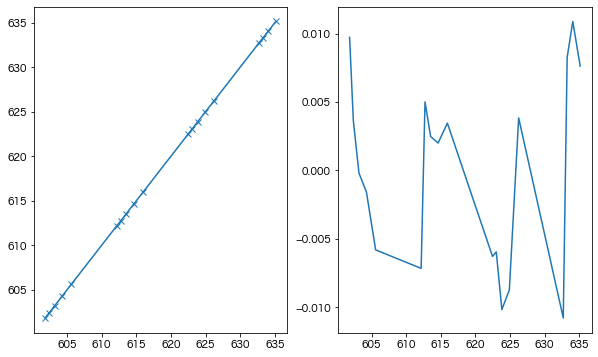

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(peak, target, '-x')
plt.subplot(122)
func = np.poly1d(np.polyfit(peak, target, 1))
x = peak
plt.plot(x, func(x)-target)

In [10]:
fulcher.show(wavelength, spectrum)

# ボルツマンプロットの作成
## サンプルデータ

In [8]:
# fulcher-α発光線(v=0, N=1~20)の発光強度データ
# 計測できなかったデータは0
data = np.load('data/sample_amplitudes.npy')[0]
data

array([64128.44764431, 19664.65611872, 52452.79643011,  4723.19285588,
        7089.48411502,  1341.16166862,  1991.45554244,   176.68250128,
           0.        ,     0.        ,   480.25110246,   234.82851451,
           0.        ,     0.        ,   306.97386897,    74.99286504,
         115.25340179,     0.        ,     0.        ,     0.        ])

## population計算とボルツマンプロット

[{'N_numbers': array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 15, 16, 17]),
  'population': array([9.34766758e+14, 5.17828713e+14, 3.30649961e+14, 6.99716159e+13,
       2.88981648e+13, 1.40237347e+13, 6.08883146e+12, 1.44755025e+12,
       1.01954822e+12, 1.40215542e+12, 5.24756496e+11, 3.69642355e+11,
       1.82824082e+11]),
  'rotation_energies': array([0.00732827, 0.02192798, 0.04368546, 0.07243021, 0.10793489,
       0.14991533, 0.19803052, 0.25188262, 0.4430295 , 0.51471417,
       0.74412717, 0.82273223, 0.90093611])}]


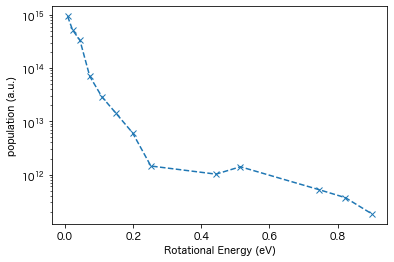

In [9]:
#fulcher.boltzmannplot([data_v0, data_v1,data_v2], v=[0,1,2])
result = fulcher.boltzmannplot([data], v=[0])
pprint.pprint(result)